In [ ]:
plan faire app sur une image test sur plusieurs
app rapide
print image app d'abord
pose le problème de la généralisation

In [1]:
import numpy as np
import matplotlib.image as Image
import matplotlib.pyplot as plt
import networkx as nx
import imageio
from skimage.transform import resize
from skimage.transform import rescale


(180, 150, 3)
(36, 30, 3)
(36, 30, 3)


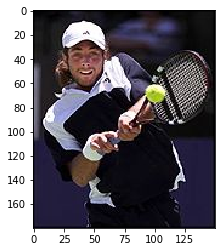

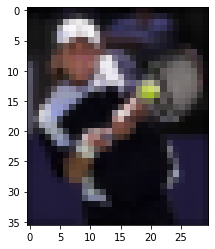

In [2]:
im=Image.imread('./data/image/image (1).jpg')
#im = resize(im, (28, 28))

plt.figure(1)
plt.imshow(im)
print(im.shape)

im = rescale(im,0.2,multichannel=True)#resize(im, (28, 28))
print(im.shape)
plt.figure(2)
plt.imshow(im)
print(im.shape)

(36, 30, 3)
[0.01189436 0.01189436 0.01189436]


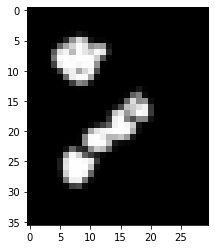

In [3]:
im=Image.imread('./data/mask/mask (1).png')
im = rescale(im,0.2,multichannel=True)#resize(im, (28, 28))

plt.figure(1)
plt.imshow(im)
print(im.shape)
print(im[5,5])

In [4]:
G=nx.grid_2d_graph(im.shape[0], im.shape[1], periodic=False, create_using=None)
node_label = {}
for x in range(0,im.shape[0]):
    for y in range(0,im.shape[1]):
        node_label[(x,y)]=im[x,y]
        
nx.set_node_attributes(G,node_label,'feature')

print(len(G.nodes))
print(len(G.edges))
print(G.number_of_nodes())
print(G.number_of_edges())

#attrs = {(0,0): {'attr1': 20, 'attr2': 'nothing'}, 1: {'attr2': 3}}


listnodes = list(G.nodes(data='feature'))
n=listnodes[0]
print(n)
print(n[1])
#print(n[1]['attr1'])
#for v in G.nodes():
#    print(v[0])
    
#for e in G.edges():
#    print(e)



1080
2094
1080
2094
((0, 0), array([0., 0., 0.], dtype=float32))
[0. 0. 0.]


(1080, 3)
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]


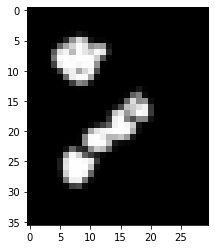

In [5]:
imflat=im.reshape((-1,3))
print(imflat.shape)
print(imflat[0])
print(im[0,0])
print(imflat[im.shape[1]-1])
print(im[0,im.shape[1]-1])
imflatim=imflat.reshape((im.shape[0], im.shape[1],3))
plt.figure(1)
plt.imshow(imflatim)


In [6]:
listnodes = list(G.nodes(data='feature'))

n=listnodes[0]
print(n[1])

#listnodes = list(G.nodes(data='feature'))
#n=listnodes[0]


#nx.set_node_attributes(G,node_label,'feature')

#node_label = {}
#for i in range(0,27000):
#    node_label[i]=imflat[i]
#    G.add_nodes_from(i, feature=imflat[i])
#print(node_label[0])
#nx.set_node_attributes(G,node_label,'feature')
#print(list(G.nodes(data='feature'))[0])
#print(np.array(G.nodes(data='feature')).shape)
#rr=np.array(G.nodes(data='feature'))
#print(rr[100,1][0])

[0. 0. 0.]


In [7]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')
print(list(G.nodes))

print(list(G.edges))

print(list(G.adj[1]))  # or list(G.neighbors(1))

print(G.degree[1])  # the number of edges incident to 1


[1, 2, 3, 'spam', 's', 'p', 'a', 'm']
[(1, 2), (1, 3), (3, 'm')]
[2, 3]
2


In [8]:
def readimage(file,largestdim):
    im=Image.imread(file)
    im = rescale(im,1,multichannel=True)
    r=im.shape[0]
    c=im.shape[1]
    if largestdim==-1:
            if np.max([r,c])>largestdim:
                rescalefactor=largestdim/float(np.max([r,c]))
                im = rescale(im,rescalefactor,multichannel=True)#resize(im, (im.shape[0], im.shape[1]))
                r=im.shape[0]
                c=im.shape[1]
    else:
            if np.max([r,c])>largestdim:
                rescalefactor=largestdim/float(np.max([r,c]))
                im = rescale(im,rescalefactor,multichannel=True)#resize(im, (im.shape[0], im.shape[1]))
                r=im.shape[0]
                c=im.shape[1]
    
    G=nx.grid_2d_graph(im.shape[0], im.shape[1], periodic=False, create_using=None)
    node_label = {}
    for x in range(0,im.shape[0]):
        for y in range(0,im.shape[1]):
            node_label[(x,y)]=im[x,y,0:3]
        
    nx.set_node_attributes(G,node_label,'feature')
    return G,(r, c)


def readimagemask(file,r,c):
    im=Image.imread(file)
    if r==-1:
            #im = rescale(im,rescalefactor,multichannel=True)#resize(im, (im.shape[0], im.shape[1]))
            im = resize(im, (r, c))
            #r=im.shape[0]
            #c=im.shape[1]
    else:
            im = resize(im, (r, c))#rescale(im,rescalefactor,multichannel=True)#resize(im, (resizerow, resizecol))
            #r=im.shape[0]
            #c=im.shape[1]
            
    G=nx.grid_2d_graph(im.shape[0], im.shape[1], periodic=False, create_using=None)
    node_label = {}
    for x in range(0,im.shape[0]):
        for y in range(0,im.shape[1]):
            sumvec=im[x,y].sum()
            if sumvec<0.5:
                node_label[(x,y)]=0
            else:
                node_label[(x,y)]=1
        
    nx.set_node_attributes(G,node_label,'feature')
    return G


    

In [9]:
G=readimagemask('./data/mask/mask (1).png',28,28)
nodelist, nodesfeatures = map(list, zip(*G.nodes(data='feature')))
print(len(nodelist))
print(len(nodesfeatures))
print(nodelist[660])


784
784
(23, 16)


In [10]:
G,(r,c)=readimage('./data/image/image (1).jpg',28)
#pos = nx.spring_layout(G, iterations=100)
#nx.draw(G, pos, node_color='k', node_size=0, with_labels=False)
print((r,c))

(28, 23)


In [11]:
nodelist, nodesfeatures = map(list, zip(*G.nodes(data='feature')))
print(len(nodelist))
print(len(nodesfeatures))
print(nodelist[0])
print(nodesfeatures[1])

644
644
(0, 0)
[0.02771388 0.02757013 0.03546918]


In [12]:
import torch.utils.data as data
from torch.utils.data import DataLoader

class SkinNotSkin(data.Dataset):
  def __init__(self, root_path,trainortest,largestdim):
    self.root = root_path
    image_path=root_path+"/image/"
    mask_path=root_path+"/mask/"
    self.imagefiles=[]
    self.maskfiles=[]
    self.trainortest=trainortest
    self.largestdim=largestdim
    
    start=1
    end=5#40
    if trainortest==False:
        start=40
        end=88
        
    for i in range(start,end):
        s1=image_path+"image ("+str(i)+").jpg"
        #print(s1)
        self.imagefiles.append(s1)
        s2=mask_path+"mask ("+str(i)+").png"
        #print(s2)
        self.maskfiles.append(s2)
    
    
  def __getitem__(self, index):
    # Read the graph and label
    if self.trainortest==True:
        gimage,rc = readimage(self.imagefiles[index],self.largestdim)
        gmask = readimagemask(self.maskfiles[index],rc[0],rc[1])
    else :
        gimage,rc = readimage(self.imagefiles[index],self.largestdim)
        gmask = readimagemask(self.maskfiles[index],rc[0],rc[1])
        
    
    nodelist, nodesfeatures = map(list, zip(*gimage.nodes(data='feature')))
    nodesfeatures = np.array(nodesfeatures)
    edges = np.array(nx.adjacency_matrix(gimage, nodelist=nodelist).todense())
    
    
    targetlist, targetfeatures = map(list, zip(*gmask.nodes(data='feature')))
    targetfeatures = np.array(targetfeatures)
    return nodesfeatures, edges, targetfeatures,rc
  
  
  def __len__(self):
    # Subset length
    return len(self.imagefiles)



In [13]:

# Define the corresponding subsets for train, validation and test.
largestdim=100
trainset = SkinNotSkin('./data', True,largestdim)
testset = SkinNotSkin('./data', False,largestdim)


print(trainset.__getitem__(0)[0].shape)
print(trainset.__getitem__(0)[0][0])
print(trainset.__getitem__(0)[1].shape)
print(trainset.__getitem__(0)[2].shape)
#print(trainset.__getitem__(20)[1])
#print(trainset.__getitem__(20)[2])


(8300, 3)
[0.00014819 0.00014819 0.00799133]
(8300, 8300)
(8300,)


In [14]:
from scipy.linalg import block_diag

def collate(samples):
    #print(len(samples))
    #print(len(samples[0]))
    #print(samples[0][0].shape)
    #print(samples[0][1].shape)
    #print(samples[0][2].shape)
    # The input `samples` is a list of pairs
    #  (graph, label).
    batched_nodes, batched_edges, labels, rc = map(list, zip(*samples))
    #batched_nodes, batched_edges, labels =  map(list, samples)
    #batched_nodes=samples[:][0]
    #batched_nodes=samples[:][0]
    
    graph_shape = list(map(lambda g: g.shape[0], batched_nodes))
    
    # Return Node features, adjacency matrix, graph size and labels
    return  torch.tensor(np.concatenate(batched_nodes, axis=0)).float(), \
            torch.tensor(block_diag(*batched_edges)).float(), \
            torch.tensor(graph_shape), \
            torch.tensor(np.concatenate(labels, axis=0)).float(),\
            rc,\
            #torch.tensor(labels)
        
# Define the three dataloaders. Train data will be shuffled at each epoch   
train_loader = DataLoader(trainset, batch_size=1, shuffle=True,
                         collate_fn=collate)
test_loader = DataLoader(testset, batch_size=1, collate_fn=collate)

In [15]:
import torch
import torch.nn as nn

class GraphConvolution(nn.Module):
  """
    Simple graph convolution
  """
  
  def __init__(self, in_features, out_features, bias=True, batchnorm=False):
    super(GraphConvolution, self).__init__()
    self.in_features = in_features
    self.out_features = out_features
    self.bias = bias
    self.fc = nn.Linear(3*self.in_features, self.out_features, bias=self.bias)
    
    self.batchnorm = batchnorm
    
      
  #x are node features for all graphs batch
  #W are adjacency matrix for all graphs batch
  # GraphConv = AHW
  def forward(self, H, A):
    res = torch.zeros((H.shape[0],self.in_features*3))
    
    output1 = torch.matmul(A[0], H)
    res[:,0:self.in_features]=output1
    
    output2 = torch.matmul(A[1], H)
    degree=A[1].sum(axis=0)
    deg=torch.zeros((H.shape[0],self.in_features))
    deg[:,0]=degree
    deg[:,1]=degree
    deg=deg+1
    output2=torch.div(output2,deg)
    res[:,self.in_features:2*self.in_features]=output2
    
    output3 = torch.matmul(A[2], H)
    output3=torch.div(output3,deg)
    res[:,2*self.in_features:3*self.in_features]=output3
        
    #FC is just a linear function input multiplied by the paramaters W
    output = self.fc(res)
    
    return output

In [16]:
import torch.nn.functional as F
# A Simple model with 2 graph conv layers and one linear layer for classification
# activation function are ReLus
class Net(nn.Module):
  def __init__(self, in_dim, hidden_dim, n_classes):
    super(Net, self).__init__()
    self.layers = nn.ModuleList([
        GraphConvolution(in_dim, hidden_dim),
        GraphConvolution(hidden_dim, hidden_dim)])
    self.classify = nn.Linear(hidden_dim, n_classes)
    
  def forward(self, h, adj, gs):
    # Add self connections to the adjacency matrix
    id = torch.eye(h.shape[0])
    adj2=torch.pow(adj,2)
    for conv in self.layers:
      h = F.relu(conv(h, [id,adj,adj2]))
    
    
    return self.classify(h)

In [17]:
import torch.optim as optim

nb_channels=3 #RGB
num_class=2
model = Net(nb_channels, 256,num_class )
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
model.train()


epoch_losses = []
for epoch in range(40):
  epoch_loss = 0
  for iter, (bn, be, gs, label,rc) in enumerate(train_loader):
    prediction = model(bn, be, gs)
    #print(prediction.shape)
    #print(label.long().shape)
    loss = loss_func(prediction, label.long())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_loss += loss.detach().item()
  epoch_loss /= (iter + 1)
  print('Epoch {}, loss {:.4f}'.format(epoch, epoch_loss))
  epoch_losses.append(epoch_loss)

Epoch 0, loss 1.2980
Epoch 1, loss 1.0731
Epoch 2, loss 0.3858
Epoch 3, loss 0.3922
Epoch 4, loss 0.3460
Epoch 5, loss 0.2955
Epoch 6, loss 0.3018
Epoch 7, loss 0.2875
Epoch 8, loss 0.2831
Epoch 9, loss 0.2706
Epoch 10, loss 0.2729
Epoch 11, loss 0.2663
Epoch 12, loss 0.2653
Epoch 13, loss 0.2619
Epoch 14, loss 0.2692
Epoch 15, loss 0.2477
Epoch 16, loss 0.2557
Epoch 17, loss 0.2474
Epoch 18, loss 0.2459
Epoch 19, loss 0.2480
Epoch 20, loss 0.2439
Epoch 21, loss 0.2696
Epoch 22, loss 0.2743
Epoch 23, loss 0.2466
Epoch 24, loss 0.2420
Epoch 25, loss 0.2394
Epoch 26, loss 0.2383
Epoch 27, loss 0.2404
Epoch 28, loss 0.2388
Epoch 29, loss 0.2282
Epoch 30, loss 0.2539
Epoch 31, loss 0.2414
Epoch 32, loss 0.2251
Epoch 33, loss 0.2261
Epoch 34, loss 0.2156
Epoch 35, loss 0.2148
Epoch 36, loss 0.2187
Epoch 37, loss 0.2193
Epoch 38, loss 0.2202
Epoch 39, loss 0.2329


In [18]:
def accuracy(output, target):
  """Accuacy given a logit vector output and a target class
  """
  _, pred = output.topk(1)
  pred = pred.squeeze()
  correct = pred == target
  correct = correct.float()
  return correct.sum() * 100.0 / correct.shape[0]



In [19]:
model.eval()
acc = 0
with torch.no_grad():
  for iter, (bn, be, gs, label,rc) in enumerate(train_loader):
    prediction = model(bn, be, gs)
    acc += accuracy(prediction, label) 
acc = acc/len(trainset)

print('Train accuracy {:.4f}'.format(acc))

Train accuracy 91.3168


In [20]:

model.eval()
acc = 0
with torch.no_grad():
  for iter, (bn, be, gs, label,rc) in enumerate(test_loader):
    prediction = model(bn, be, gs)
    acc += accuracy(prediction, label) #* label.shape[0]
acc = acc/len(testset)

print('Test accuracy {:.4f}'.format(acc))

Test accuracy 27.5185


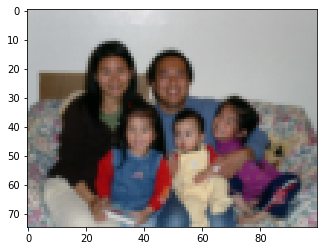

In [21]:
acc = 0
with torch.no_grad():
  tt=40  
  for iter, (bn, be, gs, label,rc) in enumerate(test_loader):
    r=rc[0][0]
    c=rc[0][1]
    prediction = model(bn, be, gs)
    im=np.zeros((r,c))
    count=0
    for x in range(0,r):
        for y in range(0,c):
            im[x,y]=prediction[count].argmax()#prediction[count][1].numpy()#prediction[count].argmax()
            count=count+1
    plt.imshow(im)
    plt.savefig('./data/res/image ('+str(tt)+') res.png')
    
    im=np.zeros((r,c))
    count=0
    for x in range(0,r):
        for y in range(0,c):
            im[x,y]=label[count].numpy()
            count=count+1
    plt.imshow(im)
    plt.savefig('./data/res/image ('+str(tt)+') gt.png')
    
    im=bn.reshape((r, c,3))
    plt.imshow(im)
    plt.savefig('./data/res/image ('+str(tt)+') rs.png')
    tt =tt +1
    


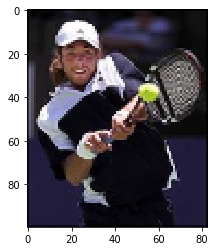

In [22]:
acc = 0
with torch.no_grad():
  tt=1  
  for iter, (bn, be, gs, label,rc) in enumerate(train_loader):
    r=rc[0][0]
    c=rc[0][1]
    prediction = model(bn, be, gs)
    im=np.zeros((r,c))
    count=0
    for x in range(0,r):
        for y in range(0,c):
            im[x,y]=prediction[count].argmax()#prediction[count][1].numpy()#prediction[count].argmax()
            count=count+1
    plt.imshow(im)
    plt.savefig('./data/res/image ('+str(tt)+') res.png')
    
    im=np.zeros((r,c))
    count=0
    for x in range(0,r):
        for y in range(0,c):
            im[x,y]=label[count].numpy()
            count=count+1
    plt.imshow(im)
    plt.savefig('./data/res/image ('+str(tt)+') gt.png')
    
    im=bn.reshape((r, c,3))
    plt.imshow(im)
    plt.savefig('./data/res/image ('+str(tt)+') rs.png')
    tt =tt +1
    


In [23]:
res=testset.__getitem__(10)
bn=np.array([res[0]])  
print(bn.shape)
be=np.array([res[1]])    
print(be.shape)
gs=np.array([res[0].shape[0]])
gs=gs.reshape((1,1))
print(gs.shape)
prediction = model(bn, be, gs)


(1, 7000, 3)
(1, 7000, 7000)
(1, 1)


TypeError: pow() received an invalid combination of arguments - got (numpy.ndarray, int), but expected one of:
 * (Tensor input, Tensor exponent, Tensor out)
 * (Number self, Tensor exponent, Tensor out)
 * (Tensor input, Number exponent, Tensor out)
